In [28]:
# ============================================
# CELL 1: Import necessary libraries
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [50]:
# ============================================
# CELL 2: Load dataset
# ============================================

# Load your preprocessed dataset (the one with one-hot encoded features)
df_1 = pd.read_csv(r'D:\Project DS Final\check\flight_dep_linear.csv')
df = df_1[df_1['DEP_DELAY'] > 0]


# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head())


Shape of dataset: (19258, 124)

Columns:
 ['DAY_OF_MONTH', 'CRS_ELAPSED_TIME', 'DISTANCE', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed', 'DEP_HOUR_sin', 'DEP_HOUR_cos', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS', 'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_F9', 'OP_UNIQUE_CARRIER_G4', 'OP_UNIQUE_CARRIER_HA', 'OP_UNIQUE_CARRIER_MQ', 'OP_UNIQUE_CARRIER_NK', 'OP_UNIQUE_CARRIER_OO', 'OP_UNIQUE_CARRIER_UA', 'OP_UNIQUE_CARRIER_WN', 'ORIGIN_BLI', 'ORIGIN_GEG', 'ORIGIN_PAE', 'ORIGIN_PSC', 'ORIGIN_SEA', 'DEST_ABQ', 'DEST_ANC', 'DEST_ATL', 'DEST_AUS', 'DEST_AZA', 'DEST_BLI', 'DEST_BNA', 'DEST_BOI', 'DEST_BOS', 'DEST_BUR', 'DEST_BWI', 'DEST_BZN', 'DEST_CHS', 'DEST_CLE', 'DEST_CLT', 'DEST_CMH', 'DEST_CVG', 'DEST_DAL', 'DEST_DCA', 'DEST_DEN', 'DEST

In [51]:
# ============================================
# CELL 3: Define features and target variable
# ============================================

# Define target variable
target = 'DEP_DELAY'

# Define feature matrix (drop target)
X = df.drop(columns=[target])
y = df[target]

print("Number of features:", X.shape[1])
print("Target variable:", target)


Number of features: 123
Target variable: DEP_DELAY


In [52]:
# ============================================
# CELL 4: Identify numeric features for scaling
# ============================================

numeric_features = [
    'CRS_ELAPSED_TIME', 'DISTANCE',
    'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed'
]

print("Numeric features to be scaled:\n", numeric_features)


Numeric features to be scaled:
 ['CRS_ELAPSED_TIME', 'DISTANCE', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed']


In [53]:
# ============================================
# CELL 5: Split train and test data
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (15406, 123)
Test set shape: (3852, 123)


In [54]:
# ============================================
# CELL 6: Apply StandardScaler to numeric features
# ============================================

scaler = StandardScaler()

# Fit on training data, then transform both train & test
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Scaling completed successfully!")


Scaling completed successfully!


In [55]:
# ============================================
# CELL 7: Train Linear Regression model
# ============================================

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training completed.")
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))


✅ Model training completed.
Intercept: 43.87617066528942
Number of coefficients: 123


In [56]:
# ============================================
# CELL 8: Make predictions on test data
# ============================================

y_pred = model.predict(X_test)

# Display few predictions
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})
print(comparison)


   Actual  Predicted
0     4.0  39.369168
1    14.0  28.417899
2     1.0  35.851726
3    97.0  25.518159
4    19.0  27.958651
5     3.0  17.197446
6    63.0  56.588843
7    43.0  43.120121
8     1.0  32.212975
9     6.0  29.929116


In [57]:
# ============================================
# CELL 9: Evaluate model performance
# ============================================

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.3f}")
print(f"MSE  (Mean Squared Error): {mse:.3f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print(f"R²   (R-squared): {r2:.3f}")


Model Evaluation Metrics:
MAE  (Mean Absolute Error): 26.993
MSE  (Mean Squared Error): 2009.785
RMSE (Root Mean Squared Error): 44.831
R²   (R-squared): 0.017


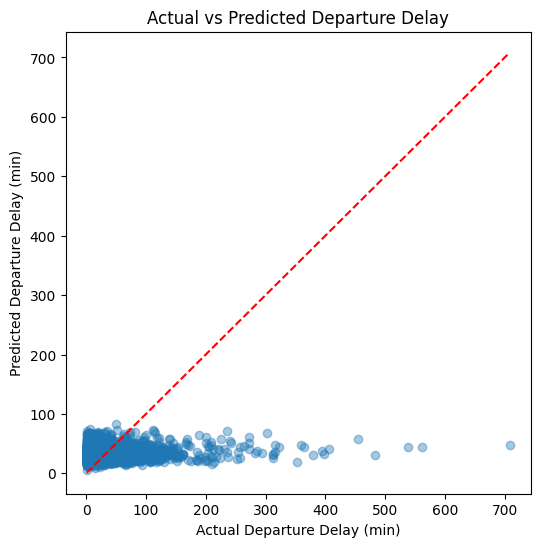

In [58]:
# ============================================
# CELL 10: Plot Predicted vs Actual
# ============================================

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Departure Delay (min)")
plt.ylabel("Predicted Departure Delay (min)")
plt.title("Actual vs Predicted Departure Delay")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Top 15 important features (by absolute coefficient):

DEST_RSW    67.188383
DISTANCE   -65.416975
DEST_EWR    61.737435
DEST_BLI   -55.883363
DEST_CLT    55.826151
DEST_MFR   -54.330422
DEST_FLL    53.952774
DEST_HLN   -50.646999
DEST_PDX   -50.336890
DEST_SEA   -50.222759
DEST_PSC   -48.827233
DEST_EUG   -48.730148
DEST_MIA    48.306782
DEST_MRY   -47.097883
DEST_BOS    46.836722
dtype: float64


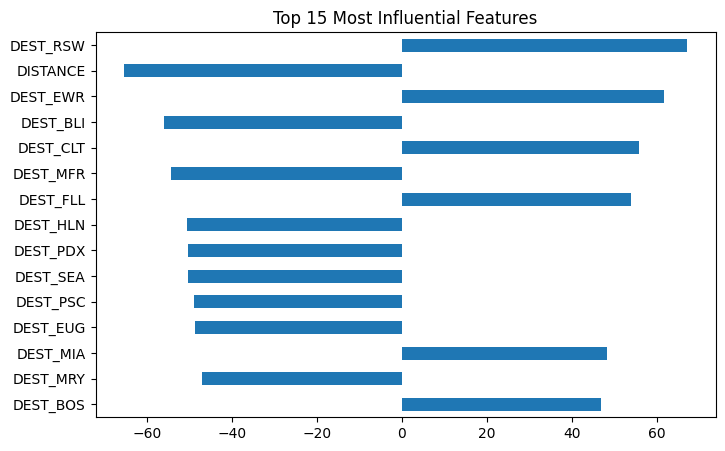

In [61]:
# ============================================
# CELL 11: Analyze feature importance (coefficients)
# ============================================

coefs = pd.Series(model.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)

# Display top 15 features by absolute value
print("Top 15 important features (by absolute coefficient):\n")
print(coefs.head(15))

# Optional: plot
plt.figure(figsize=(8,5))
coefs.head(15).plot(kind='barh')
plt.title("Top 15 Most Influential Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# ============================================
# CELL 12: Save model and scaler for future use
# ============================================

import joblib

joblib.dump(model, "linear_model_flight.pkl")
joblib.dump(scaler, "scaler_flight.pkl")

print("Model and scaler saved successfully!")
